# CAP - 379
# Depth First Search Algorithm

# Creating Graphs Using `networkx` Library
## Use the following command to install `networkx` library
```python
pip install networkx
```


### 1. Graph Representation:
- The graph is created using **NetworkX**, a library for handling graphs in Python.
- **Nodes**: Represent entities (e.g., A, B, C).
- **Edges**: Represent directed connections between nodes (e.g., A → B).

### 2. Creating and Adding Edges:
- `nx.DiGraph()` creates a directed graph.
- `G.add_edges_from(edges)` adds connections between nodes.

### 3. Drawing the Graph:
- `plt.figure(figsize=(6,4))` sets the canvas size.
- `nx.spring_layout(G)`: Arranges nodes automatically.
- `nx.draw(G, pos, with_labels=True)`: Draws the graph with:
  - Node labels (A, B, etc.).
  - Light blue **nodes** and gray **edges**.
- `plt.title(title)`: Adds a title to the graph.
- `plt.show()`: Displays the graph.

### 4. Example Graph:
#### Nodes:
- A, B, C, D, E, F

#### Edges:
- A → B, A → C
- B → D, B → E
- C → F
- D → C
- E → F

### 5. Function Call:
- `draw_graph(edges, nodes, "Graph: Depth First Search")`
  - Draws the graph with the defined nodes and edges.


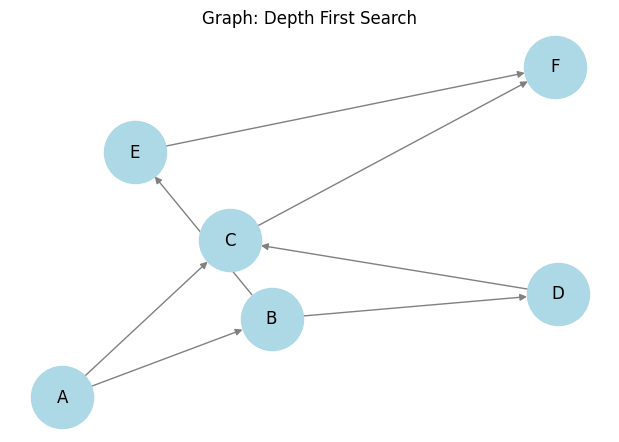

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to draw the graph
def draw_graph(edges, nodes, title):
    G = nx.DiGraph()
    G.add_edges_from(edges)
    
    plt.figure(figsize=(6, 4))
    pos = nx.spring_layout(G)  # Layout for better visualization
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
    labels = {(u, v) for u, v in edges}
    plt.title(title)
    plt.show()

edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('D', 'C'), ('E', 'F')]
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
draw_graph(edges, nodes, "Graph: Depth First Search")

# **Depth-First Search (DFS) Algorithm Explanation**

## **1. Key Differences Between DFS, BFS, and Dijkstra's Algorithm**
| Feature | DFS | BFS | Dijkstra’s Algorithm |
|---------|-----|-----|------------------|
| **Traversal Type** | Deepest path first | Level by level | Shortest weighted path |
| **Data Structure** | Stack (Recursion) | Queue (FIFO) | Priority Queue (Min-Heap) |
| **Edge Weights** | Ignored | Ignored | Used |
| **Use Case** | Graph traversal, cycle detection, maze solving | Finding shortest path (in unweighted graphs) | Finding shortest weighted path |

## **2. How DFS Works**
### **Step 1: Start Traversal**
- Begin at the `start` node.
- **Mark it as visited** and print it.

### **Step 2: Recursively Explore Neighbors**
- Move to **each unvisited neighbor** and apply DFS recursively.

### **Step 3: Backtrack if No More Neighbors**
- If a node **has no unvisited neighbors**, return to the previous node.
- Continue exploring **until all reachable nodes are visited**.

## **3. Graph Representation**


In [13]:
def dfs(graph, start, visited=None):         
    if visited is None:
        visited = set()

    visited.add(start)        # Mark the starting node as visited and add it to the visited set
    print(start, end=" ")       # Print the starting node

    for neighbor in graph[start]:       # Explore all neighbors of the starting node
        if neighbor not in visited:     # If the neighbor has not been visited yet, explore it recursively
            dfs(graph, neighbor, visited)       

# Example usage:
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

print("DFS Traversal:")
dfs(graph, 'A')

DFS Traversal:
A B D E F C 

## Practice Exercise 
## Now create the Digraph from the following Nodes using `networkx` Library

``` python
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B', 'G'],
    'E': ['B'],
    'F': ['C','H'],
    'G': ['D'],
    'H': ['F'],
    'I':['G']
}
```

## **Directed Weighted Graph**
### **Adding Weights to the Graph**
- The previous version had **no edge weights**, treating all edges as equal.
- Now, edges have **weights**, impacting traversal strategies.

### **Visualizing Edge Weights**
- In the previous BFS graph, edges were drawn **without numerical labels**.
- Now, edge weights are **explicitly displayed** using:
  ```python
  labels = {(u, v): d for u, v, d in edges}
  nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)


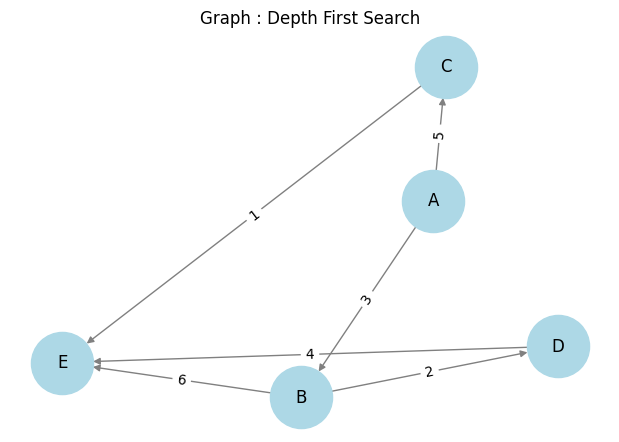

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to draw the graph
def draw_graph(edges, nodes, title):
    G = nx.DiGraph()
    G.add_weighted_edges_from(edges)
    # G.add_edges_from(edges)
    
    plt.figure(figsize=(6, 4))
    pos = nx.spring_layout(G)  # Layout for better visualization
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
    labels = {(u, v):d for u, v, d in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)
    plt.title(title)
    plt.show()


edges= [('A', 'B', 3), ('A', 'C', 5), ('B', 'D', 2), ('B', 'E', 6),
           ('C', 'E', 1), ('D', 'E', 4)]
nodes= ['A', 'B', 'C', 'D', 'E']
draw_graph(edges, nodes, "Graph : Depth First Search")

DFS Traversal Order: A -> B -> D -> E -> C


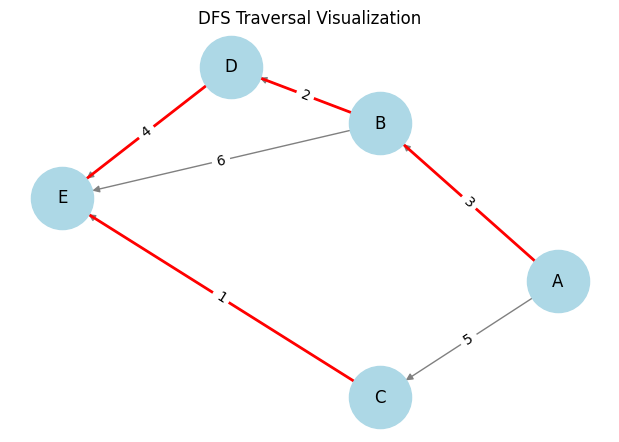

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to perform DFS and return traversal order
def dfs(graph, start, visited=None, traversal=None):
    if visited is None:
        visited = set()
        traversal = []

    visited.add(start)
    traversal.append(start)  # Store traversal order

    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited, traversal)
    
    return traversal

# Function to draw the DFS traversal graph
def draw_dfs_graph(edges, traversal, title):
    G = nx.DiGraph()
    G.add_weighted_edges_from(edges)

    plt.figure(figsize=(6, 4))
    pos = nx.spring_layout(G)  # Layout for better visualization
    
    # Draw all edges in gray
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
    
    # Highlight DFS traversal edges in red
    traversal_edges = [(traversal[i], traversal[i+1]) for i in range(len(traversal)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=traversal_edges, edge_color='red', width=2)
    
    # Draw edge labels (weights)
    labels = {(u, v): d for u, v, d in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)

    plt.title(title)
    plt.show()

# Defining the weighted graph
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['E'],
    'D': ['E'],
    'E': []
}

edges = [('A', 'B', 3), ('A', 'C', 5), ('B', 'D', 2), ('B', 'E', 6),
         ('C', 'E', 1), ('D', 'E', 4)]

nodes = ['A', 'B', 'C', 'D', 'E']

# Perform DFS from 'A'
dfs_traversal = dfs(graph, 'A')
print("DFS Traversal Order:", " -> ".join(dfs_traversal))

# Visualize DFS traversal
draw_dfs_graph(edges, dfs_traversal, "DFS Traversal Visualization")


## Practice Exercise 
## Now create the Weighted Digraph as shown below using `networkx` Library

![Weighted Digraph](images/DFS.jpg)
